### CNN with Image Augmentation (CIFAR10)
images of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. In RGB, 32x32 pixels. The state of the art accuracy is 96.53 percent.


In [11]:
# import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
# from tensorflow.examples.tutorials.mnist import input_data
import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import (Dense, Dropout, Activation,
                                     Flatten)

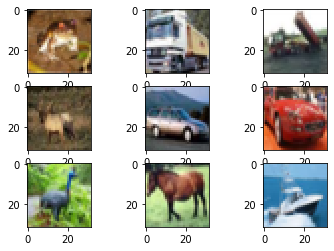

In [12]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

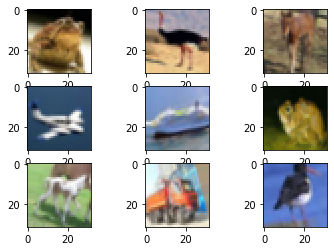

In [15]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [16]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [17]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [18]:
# labels
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [20]:
img_size = 32


In [21]:
x_train.shape

(50000, 32, 32, 3)

## 如果include_top = True，shape不能自訂

In [25]:
from keras.applications.vgg16 import VGG16, preprocess_input

vgg_model = VGG16(weights='imagenet', include_top=False,
                  input_shape=(img_size, img_size, 3))
# vgg_model.summary()

x = Flatten()(vgg_model.output)
x = Dense(128, activation='relu')(x)
# x = Dropout(0.25)(x)
outputs = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=vgg_model.inputs, outputs=outputs)
# model.summary()

In [26]:
# vgg_model.trainable = True

# trainable_layer = 3
# for layer in vgg_model.layers[:-trainable_layer]:
#     layer.trainable = False

# for layer in model.layers:
#     pass
# #     print(layer, layer.trainable)
    
learning_rate = 1e-4
optimizer = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [ ]:
# training without augmentation

model.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1


In [36]:
model.save('vgg.h5') 

In [15]:
# tf 1.14 keras  

In [17]:
!pip install keras2onnx
import keras2onnx
# import tensorflow as tf
import numpy as np
import os
from datetime import datetime

# !pip install keras2onnx
new_model = model
# image_shape = (32,32,3)
# batch_is_1_shape = [1, *image_shape]
# new_input  = keras.layers.Input(batch_shape=batch_is_1_shape)
# new_output = model(new_input)
# new_model = keras.models.Model(new_input, new_output)
# onnx_model = keras2onnx.convert_keras(new_model, new_model.name)
onnx_model = keras2onnx.convert_keras(model, model.name)
# model_path = os.path.join(target_folder,f"{name}_{'x'.join(map(str,batch_is_1_shape))}.onnx")

keras2onnx.save_model(onnx_model, './vgg.onnx')
print("*"*100)

  Using cached https://files.pythonhosted.org/packages/a6/2f/c7aef8f8215c62d55ea05f5b36737c1726e4fea6c73970909523ae497fd9/keras2onnx-1.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fe/7a/7e30c643cd7d2ad87689188ef34ce93e657bd14da3605f87bcdbc19cd5b1/onnxconverter_common-1.7.0-py2.py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac/fire-0.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/fb/3193df06e0feae7884d25e11e41b410ecd3c0a17445b941767c772dc8cf7/onnx-1.7.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0c/0e/3f026d0645d699e7320b59952146d56ad7c374e9cd72cd16e7c74e657a0f/typing_extensions-3.7.4.2-py3-none-any.whl


The ONNX operator number change on the optimization: 83 -> 40


****************************************************************************************************


In [18]:
# load keras model
from keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=True, weights='imagenet')

# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, model.name)

The ONNX operator number change on the optimization: 458 -> 127


In [19]:
keras.__version__

'2.3.1'

In [42]:
import onnx
from onnx import version_converter

original_model = onnx.load('vgg.onnx')

In [45]:
original_model.ir_version

7

In [52]:
import onnx
from onnx import version_converter

target_version = 3
ir_version     = 3

model_path     = './vgg.onnx'
original_model = onnx.load(model_path)

converted_model = version_converter.convert_version(original_model , target_version)
converted_model.ir_version = ir_version

onnx.save(converted_model, './model.onnx')

IndexError: Input block1_conv1/kernel:0 is undefined!

In [48]:
onnx.__version__

'1.7.0'

In [51]:
!pip install onnx==1.4.1

     |████████████████████████████████| 2.9MB 354kB/s eta 0:00:01
     |████████████████████████████████| 81kB 561kB/s  eta 0:00:01
  Created wheel for onnx: filename=onnx-1.4.1-cp37-cp37m-linux_x86_64.whl size=3650224 sha256=03863f79a47b2ccf7e0cb177a02096f0725c91fff6316387310759b282fff1bc
  Stored in directory: /home/jovyan/.cache/pip/wheels/c5/00/a9/a7cfb520da479a257975b5d25a2126f57360a7e2f0e818943a
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=e17222b003e3a57393623004dc558234c9909361ee3a2bdab205c812ee4460ab
  Stored in directory: /home/jovyan/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built onnx typing
  Found existing installation: onnx 1.7.0
    Uninstalling onnx-1.7.0:
      Successfully uninstalled onnx-1.7.0
